<a href="https://colab.research.google.com/github/xujping/20210817/blob/main/%E4%BD%9C%E6%A5%AD%E4%B8%89_Hsuping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


### 1. 讀入 MNSIT 數據集

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 你也可以讀入 Fasion 版的 MNIST

In [6]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

##<font color=red>第一個改變

>1.改變數據試試看，看看訓練資料的數據。  
</font>

In [9]:
n = 2345

In [10]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 183, 236,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 162, 252, 147,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   4, 136, 251, 247,  47,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 139, 252, 252, 119,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_train[n]

6

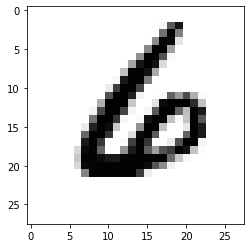

In [12]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [13]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [14]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

In [15]:
model = Sequential()

##<font color=red>改變下面兩個狀況

>2.activation function : 將"relu"換成"sigmoid"。  
>3.多加一層有100個神經元的隱藏層。  
</font>


In [16]:
model.add(Dense(100, input_dim=784, activation='sigmoid'))

In [17]:
model.add(Dense(100, activation='sigmoid'))

In [18]:
model.add(Dense(100, activation='sigmoid'))

In [19]:
model.add(Dense(10, activation='sigmoid'))

#### 組裝我們的神經網路

##<font color=red>再改變下面兩個狀況

>4.loss function : 將"mse"換成"categorical_crossentropy"。  
>5.optimizer : 將最佳化中"SGD"改成"adam"。  
</font>

In [20]:
model.compile(loss='categorical_crossentropy', optimizer="adam", 
              metrics=['accuracy'])

#### 欣賞我們的作品

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


### 5. step 2: 訓練

In [22]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.8178 - accuracy: 0.7673
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2545 - accuracy: 0.9276
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1776 - accuracy: 0.9489
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1361 - accuracy: 0.9606
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1087 - accuracy: 0.9686
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0905 - accuracy: 0.9735
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0762 - accuracy: 0.9783
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0654 - accuracy: 0.9809
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0561 - accuracy: 0.9834
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0479 - accuracy: 0.9858

##<font color=red>精確度提高至0.9867  
</font>

### 6. step 3: 預測 (testing)

In [23]:
predict = np.argmax(model.predict(x_test), axis=-1)

<font color=red>6.再改變下面的數據試試看

</font>

神經網路預測是: 5


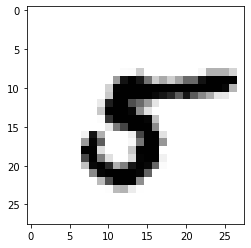

In [24]:
n = 9998

print('神經網路預測是:', predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [25]:
#model.save("my_nn.h5")